In [14]:
#Textblob analysis on small subset of data
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import csv
import chardet

with open('testFile.csv', 'rb') as f:
    result = chardet.detect(f.read())

def getSentiment(tweet):
    analysisedTweet = TextBlob(tweet)
    return analysisedTweet.sentiment

tweets = pd.read_csv('testFile.csv', encoding='Latin-1')

sentimentScore = []

originalTweet = tweets['tweet']
 
for tweet in originalTweet:
    sentimentScore.append(getSentiment(tweet).polarity)
    

newColumn = pd.DataFrame({'TextBlob': sentimentScore})
tweets = tweets.merge(newColumn, left_index = True, right_index = True)
tweets.to_csv('TextBlobSentiment.csv')


C:\Users\Adele\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


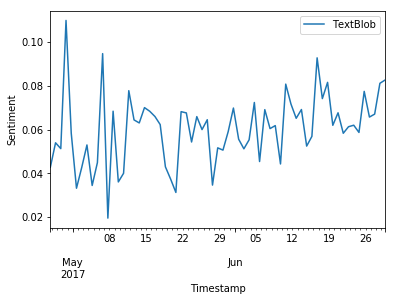

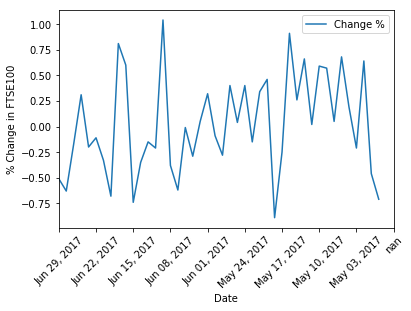

In [13]:
#get graph of sentiment over time
#graph of stock prices over time 
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt

tweets = pd.read_csv('TextBlobSentiment.csv', encoding ='ISO-8859-1')

ftse = pd.read_csv('FTSE100 Historical Data.csv')

table = tweets[['Timestamp', 'TextBlob']]

table['Timestamp'] = pd.to_datetime(table['Timestamp'], format='%d/%m/%Y %H:%M') 

meanSentiment = table.groupby(pd.Grouper(key='Timestamp', freq='24h', base=17)).mean()

graph = meanSentiment.plot(y='TextBlob')
graph.set_ylabel("Sentiment")

ftseGraph = ftse.plot(x='Date', y='Change %')
ftseGraph.set_ylabel("% Change in FTSE100")

for tick in ftseGraph.get_xticklabels():
    tick.set_rotation(45)


In [19]:
#testing accuracy of textblob on prelabled data - Sentiment140
#need to set -1 to negative, 1 to postitive and 0 to neutral
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import csv
import chardet
import re

with open('testFile.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
def cleanTweet( Tweet ):
    #remove http link 
    new = re.sub(r'http.?:\/\/[^\s]+[\s]?', '', Tweet)
    #remove numbers,hashtags,cashtags and usernames
    cleanTweet = re.sub(r'(\@\S*)|\$|\#|\.+|\,|\'', '', new)
    return( cleanTweet );

def getSentiment(tweet):
    analysisedTweet = TextBlob(tweet)
    return analysisedTweet.sentiment

tweets = pd.read_csv('Sentiment140.csv', encoding='ISO-8859-1')

predictedSentiment = []
realSentiment = []

originalTweets = tweets['Tweet']
 
for tweet in originalTweets:
    tweet = cleanTweet(tweet)
    Sentiment = getSentiment(tweet).polarity
    if Sentiment < 0:
        type = 'negative'
    elif Sentiment > 0:
        type = 'positive'
    else: 
        type = 'neutral'
    predictedSentiment.append(type)
    
for index, row in tweets.iterrows():
    realSentiment.append(row.Sentiment)
    
def getAccuracy(real, predicted):
    correct = 0
    for i in range(len(real)):
        if real[i] == predicted[i]:
            correct += 1
    print(correct)
    return (correct/float(len(real))) * 100.0
    
percentageAccuracy = getAccuracy(realSentiment, predictedSentiment)
print( percentageAccuracy )
    

321
64.45783132530121
